# Goal

The goal is to predit the temperature in the near future using the record history. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read and clean data

In [3]:
df=pd.read_csv("./data/TG_STAID002759.txt", sep="," , header=14)

In [4]:
df.head()

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0


In [5]:
df.drop(" SOUID", axis=1, inplace=True)

In [6]:
df.columns

Index(['    DATE', '   TG', ' Q_TG'], dtype='object')

* Parse the datetime

In [7]:
df['date']=pd.to_datetime(df['    DATE'], format="%Y%m%d")

In [8]:
df.columns

Index(['    DATE', '   TG', ' Q_TG', 'date'], dtype='object')

In [9]:
df.drop('    DATE'  , axis=1, inplace=True)

In [10]:
df.set_index('date', inplace=True, drop=True)

In [11]:
df.columns=['temperature', 'quality']
df

,temperature,quality
date,,
1876-01-01,22,0
1876-01-02,25,0
1876-01-03,3,0
1876-01-04,-58,0
1876-01-05,-98,0
...,...,...
2023-01-27,16,0
2023-01-28,1,0
2023-01-29,11,0


* Check the auality of data

In [12]:
df.value_counts("quality")

quality
0    53527
9      195
dtype: int64

In [13]:
df[df['quality']==9]

,temperature,quality
date,,
1945-04-25,-9999,9
1945-04-26,-9999,9
1945-04-27,-9999,9
1945-04-28,-9999,9
1945-04-29,-9999,9
...,...,...
1945-11-01,-9999,9
1945-11-02,-9999,9
1945-11-03,-9999,9


* Filling empty data

In [14]:
from  datetime import timedelta , date

def My_range(start, end):
    days_all=int((end-start).days)
    for i in range(int((end_date - start_date).days)):
        yield start + timedelta(i)
        
start_date = date(1945,4,25)
end_date = date(1945,11,5)+timedelta(1)
print(end_date)
#for day_ha in My_range(start_date, end_date):
    #print(day_ha)

for day_ha in My_range(start_date, end_date):
      df['temperature'].iloc[df.index==day_ha.strftime("%Y-%m-%d")] = df['temperature'].iloc[df.index==(day_ha+timedelta(360)).strftime("%Y-%m-%d")] 

1945-11-06


* Or use pd.daterange for a simpler version!

In [15]:
df[df['quality']==9]

,temperature,quality
date,,
1945-04-25,90,9
1945-04-26,137,9
1945-04-27,91,9
1945-04-28,76,9
1945-04-29,122,9
...,...,...
1945-11-01,31,9
1945-11-02,66,9
1945-11-03,48,9


In [16]:
df

,temperature,quality
date,,
1876-01-01,22,0
1876-01-02,25,0
1876-01-03,3,0
1876-01-04,-58,0
1876-01-05,-98,0
...,...,...
2023-01-27,16,0
2023-01-28,1,0
2023-01-29,11,0


In [17]:
df.drop('quality', axis=1, inplace=True)

In [18]:
df

,temperature
date,
1876-01-01,22
1876-01-02,25
1876-01-03,3
1876-01-04,-58
1876-01-05,-98
...,...
2023-01-27,16
2023-01-28,1
2023-01-29,11


* Check out the trend

In [19]:
#plt.plot(df.loc['1945-11-06':,'temperature'].rolling(10000).mean())

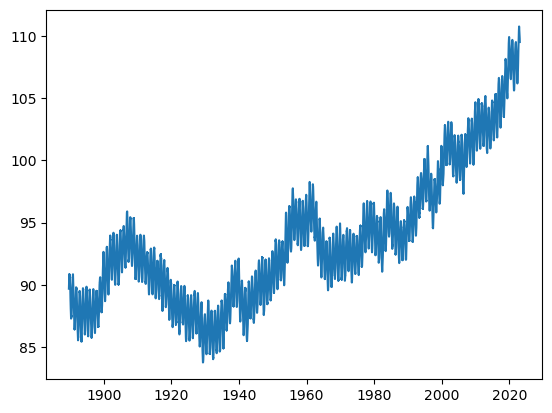

In [20]:
plt.plot(df['temperature'].rolling(5000).mean())

* Creat time steps for the time series 

In [21]:
time_step=list(range(int((date(2023,2,1)-date(1876,1,1)).days)))

In [22]:
time_step

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [23]:
X=time_step
df['time_steps']= X
df['temperature']=df['temperature']/10
y=df['temperature']
df

,temperature,time_steps
date,,
1876-01-01,2.2,0
1876-01-02,2.5,1
1876-01-03,0.3,2
1876-01-04,-5.8,3
1876-01-05,-9.8,4
...,...,...
2023-01-27,1.6,53717
2023-01-28,0.1,53718
2023-01-29,1.1,53719


## Model the tend

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
pol=(PolynomialFeatures(degree=3))

In [27]:
linreg=LinearRegression()

In [28]:
x=np.array(X)


In [29]:
x=x.reshape(-1,1)

In [30]:
x=pol.fit_transform(x)

In [31]:
linreg.fit(x,y)


LinearRegression()

In [32]:
ytrend = linreg.predict(x)


<AxesSubplot:xlabel='date', ylabel='temperature'>

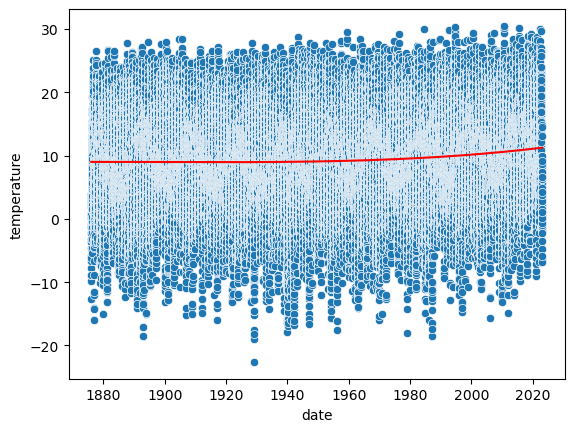

In [33]:
sns.lineplot(x=df.index,y=ytrend, color='red')
sns.scatterplot(x=df.index,y=y)

## Model the trend+seasonality

In [34]:
#df['month']=df.index.month

In [35]:
seasonal_dummies = pd.get_dummies(df.index.month, prefix='month',drop_first=True).set_index(df.index)

df_s=df.join(seasonal_dummies)
#df_s contains all info to predict the full model

In [36]:
pol=(PolynomialFeatures(degree=1))

In [37]:
x=df_s.drop(["temperature"], axis=1)
x=x.reset_index(drop=True)

In [38]:
# x=dfs.loc['2022-01-01':, ['month','time_steps']]
# y=y.loc['2022-01-01':,]

In [39]:
#x=x.reshape(-1,1)


In [40]:
x['month_2'].unique()

array([0, 1], dtype=uint8)

In [41]:
x_month = pol.fit_transform(x)

In [42]:
linreg.fit(x_month,y)

LinearRegression()

In [43]:
ypred=linreg.predict(x_month)
df_s['trend-season']=ypred

<AxesSubplot:xlabel='date', ylabel='temperature'>

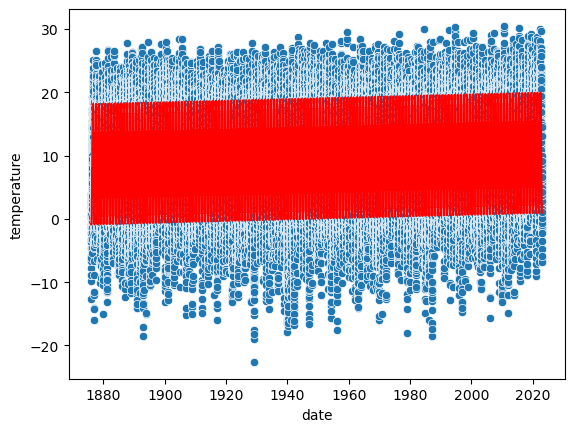

In [43]:
sns.lineplot(x=df.index,y=ypred, color='red')
sns.scatterplot(x=df.index,y=y)

In [44]:
df_rem=df['temperature']-ypred
df_rem
df['reminder']=df_rem
df_s['reminder']=df_rem
df_s

,temperature,time_steps,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend-season,reminder
date,,,,,,,,,,,,,,,
1876-01-01,2.2,0,0,0,0,0,0,0,0,0,0,0,0,-0.863530,3.063530
1876-01-02,2.5,1,0,0,0,0,0,0,0,0,0,0,0,-0.863496,3.363496
1876-01-03,0.3,2,0,0,0,0,0,0,0,0,0,0,0,-0.863462,1.163462
1876-01-04,-5.8,3,0,0,0,0,0,0,0,0,0,0,0,-0.863428,-4.936572
1876-01-05,-9.8,4,0,0,0,0,0,0,0,0,0,0,0,-0.863394,-8.936606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-27,1.6,53717,0,0,0,0,0,0,0,0,0,0,0,0.966146,0.633854
2023-01-28,0.1,53718,0,0,0,0,0,0,0,0,0,0,0,0.966180,-0.866180
2023-01-29,1.1,53719,0,0,0,0,0,0,0,0,0,0,0,0.966214,0.133786


<AxesSubplot:xlabel='date', ylabel='temperature'>

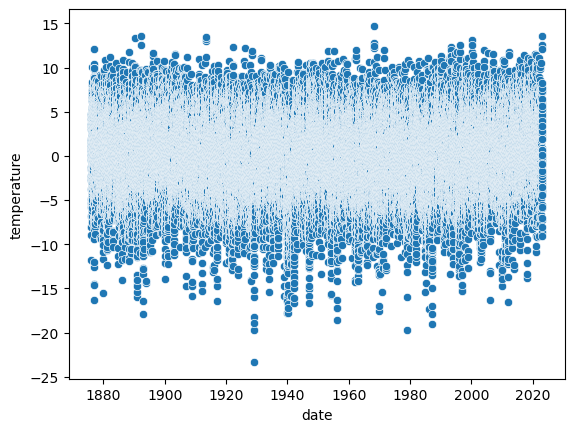

In [45]:
sns.scatterplot(x=df.index,y=df_rem)

In [46]:
#creat csv
# My={"date": df.index,"temperature":df_rem}
# My_prediction=pd.DataFrame(data=My)
# My_prediction.set_index("datetime", inplace=True)
df_rem.to_csv("fluctuations_temp.csv")
df_rem

date
1876-01-01    3.063530
1876-01-02    3.363496
1876-01-03    1.163462
1876-01-04   -4.936572
1876-01-05   -8.936606
                ...   
2023-01-27    0.633854
2023-01-28   -0.866180
2023-01-29    0.133786
2023-01-30    2.833752
2023-01-31    3.333718
Name: temperature, Length: 53722, dtype: float64

In [47]:
df['lag1']=df['reminder'].shift(1)

In [48]:
dff=df[['reminder','lag1']]

In [49]:
dff

,reminder,lag1
date,,
1876-01-01,3.063530,NaN
1876-01-02,3.363496,3.063530
1876-01-03,1.163462,3.363496
1876-01-04,-4.936572,1.163462
1876-01-05,-8.936606,-4.936572
...,...,...
2023-01-27,0.633854,-1.666112
2023-01-28,-0.866180,0.633854
2023-01-29,0.133786,-0.866180


In [50]:
dff.corr()['reminder']['lag1']

0.8038214513023297

<AxesSubplot:>

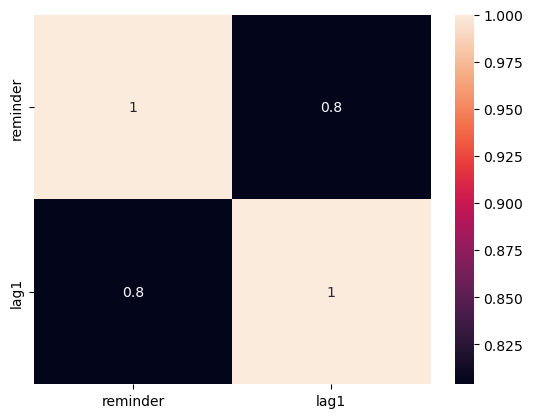

In [51]:
sns.heatmap(dff.corr(),annot=True)

Autoregressive Model

In [52]:
# for i in range(20):
#     dff['lag']=dff['reminder'].shift(i)
#     plt.scatter(i,dff.corr()['reminder']['lag'])

# first import statsmodel and then use it to plot without 
# plot_acf(df['reminder'])


In [53]:
dff.dropna(inplace=True);

dff

/var/folders/3g/y0mg2f4j3w13nmlwczchnxj80000gn/T/ipykernel_18637/3378825290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.dropna(inplace=True);


,reminder,lag1
date,,
1876-01-02,3.363496,3.063530
1876-01-03,1.163462,3.363496
1876-01-04,-4.936572,1.163462
1876-01-05,-8.936606,-4.936572
1876-01-06,-6.836640,-8.936606
...,...,...
2023-01-27,0.633854,-1.666112
2023-01-28,-0.866180,0.633854
2023-01-29,0.133786,-0.866180


In [54]:
X=dff[['lag1']]
y=dff[['reminder']]
linreg.fit(X,y)

LinearRegression()

In [55]:
ypred_r=linreg.predict(X)
dff['prediction']=ypred_r

/var/folders/3g/y0mg2f4j3w13nmlwczchnxj80000gn/T/ipykernel_18637/378582621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['prediction']=ypred_r


<AxesSubplot:xlabel='date', ylabel='reminder'>

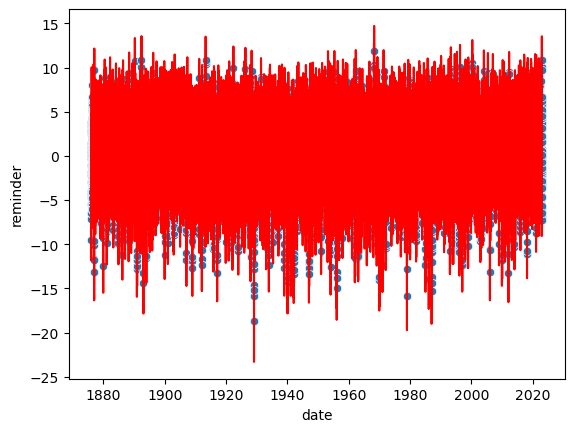

In [56]:
sns.lineplot( x=dff.index ,y=dff['reminder'], color='red')
sns.scatterplot(x=dff.index ,y=dff['prediction'])

In [57]:
dff

,reminder,lag1,prediction
date,,,
1876-01-02,3.363496,3.063530,2.462527
1876-01-03,1.163462,3.363496,2.703646
1876-01-04,-4.936572,1.163462,0.935210
1876-01-05,-8.936606,-4.936572,-3.968134
1876-01-06,-6.836640,-8.936606,-7.183450
...,...,...,...
2023-01-27,0.633854,-1.666112,-1.339265
2023-01-28,-0.866180,0.633854,0.509499
2023-01-29,0.133786,-0.866180,-0.696262


/Users/kasiafalecka/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


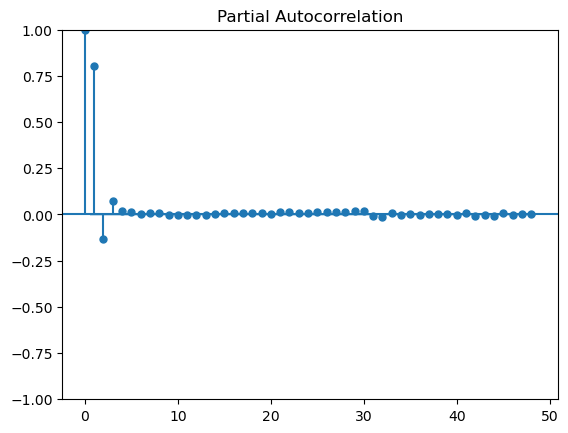

In [58]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_pacf(dff['reminder']);

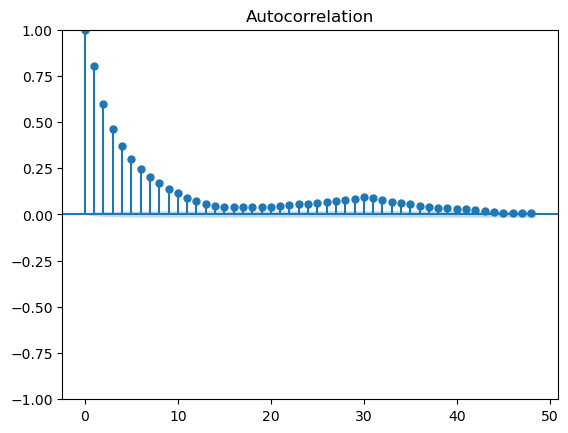

In [59]:
plot_acf(df['reminder']);


In [60]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [61]:
selected_order = ar_select_order(df['reminder'], maxlag=12)

/Users/kasiafalecka/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/kasiafalecka/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [62]:
selected_order.ar_lags

[1, 2, 3, 4]

In [63]:
selected_order.bic

{(1, 2, 3, 4): 242353.37028019485,
 (1, 2, 3, 4, 5): 242353.53524616666,
 (1, 2, 3): 242356.4699540022,
 (1, 2, 3, 4, 5, 6): 242363.0372463302,
 (1, 2, 3, 4, 5, 6, 7): 242371.73418821147,
 (1, 2, 3, 4, 5, 6, 7, 8): 242380.98827389572,
 (1, 2, 3, 4, 5, 6, 7, 8, 9): 242391.61744231664,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10): 242402.40389952928,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11): 242412.86255486205,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12): 242423.75090731107,
 (1, 2): 242612.81844792873,
 (1,): 243566.68671202846,
 0: 299337.5828819642}

In [64]:
 from statsmodels.tsa.ar_model import AutoReg

In [65]:
ar_model = AutoReg(endog=df['reminder'], lags=4).fit()

/Users/kasiafalecka/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


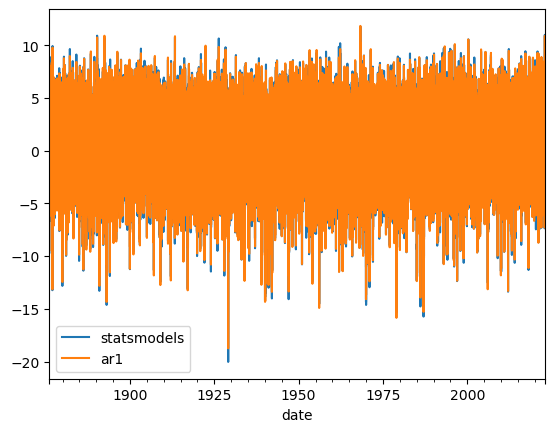

In [66]:
ar_model.predict().plot(label='statsmodels')
dff['prediction'].plot(label='ar1')
#dff['reminder'].plot(label='reminder')
plt.legend()

<AxesSubplot:>

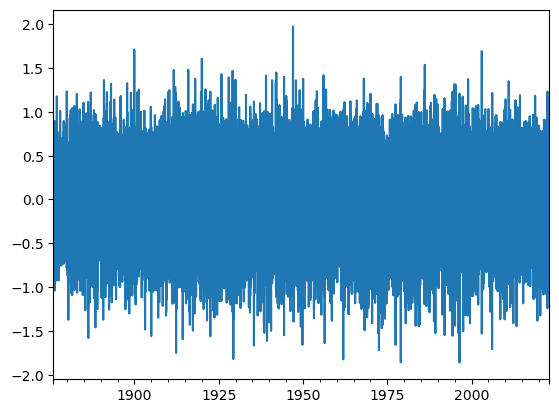

In [67]:
(ar_model.predict()-dff['prediction']).plot(label='statsmodels')

Full model now:

### Predict the full data and chech the accuracy

In [68]:
#Make the full data with 4 lags, which you learned from the autoregssor from statsmodel
#selected_order = ar_select_order(df['reminder'], maxlag=12)
#selected_order.ar_lags
for i in range(1,5):
    df_s[f'lag{i}']=df['reminder'].shift(i)

In [69]:
df_s.dropna(inplace=True)

In [71]:
df_s

,temperature,time_steps,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend-season,reminder,lag1,lag2,lag3,lag4
date,,,,,,,,,,,,,,,,,,,
1876-01-05,-9.8,4,0,0,0,0,0,0,0,0,0,0,0,-0.863394,-8.936606,-4.936572,1.163462,3.363496,3.063530
1876-01-06,-7.7,5,0,0,0,0,0,0,0,0,0,0,0,-0.863360,-6.836640,-8.936606,-4.936572,1.163462,3.363496
1876-01-07,-6.6,6,0,0,0,0,0,0,0,0,0,0,0,-0.863326,-5.736674,-6.836640,-8.936606,-4.936572,1.163462
1876-01-08,-8.9,7,0,0,0,0,0,0,0,0,0,0,0,-0.863292,-8.036708,-5.736674,-6.836640,-8.936606,-4.936572
1876-01-09,-12.7,8,0,0,0,0,0,0,0,0,0,0,0,-0.863258,-11.836742,-8.036708,-5.736674,-6.836640,-8.936606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-27,1.6,53717,0,0,0,0,0,0,0,0,0,0,0,0.966146,0.633854,-1.666112,-0.166078,-0.166044,0.633990
2023-01-28,0.1,53718,0,0,0,0,0,0,0,0,0,0,0,0.966180,-0.866180,0.633854,-1.666112,-0.166078,-0.166044
2023-01-29,1.1,53719,0,0,0,0,0,0,0,0,0,0,0,0.966214,0.133786,-0.866180,0.633854,-1.666112,-0.166078


In [72]:
X_full=df_s.drop(['temperature','trend-season','reminder'], axis=1)
y_full=df_s['temperature']

In [73]:
m_full = LinearRegression()
m_full.fit(X_full, y_full)

LinearRegression()

In [74]:
df_s['full_model'] = m_full.predict(X_full)
df_s['full_model']

date
1876-01-05   -5.367107
1876-01-06   -7.975658
1876-01-07   -5.642577
1876-01-08   -5.361922
1876-01-09   -7.638766
                ...   
2023-01-27   -0.508523
2023-01-28    1.884550
2023-01-29   -0.025158
2023-01-30    1.289339
2023-01-31    3.531160
Name: full_model, Length: 53718, dtype: float64

<AxesSubplot:xlabel='date'>

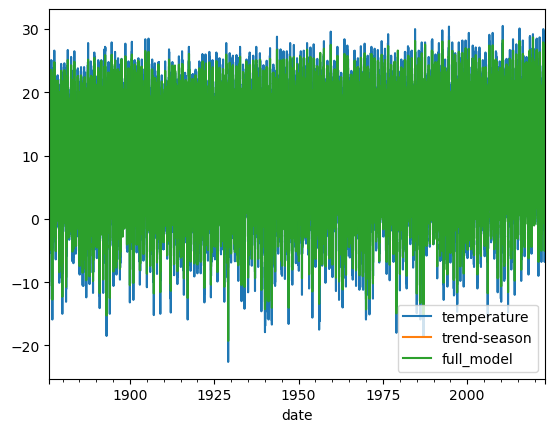

In [75]:
df_s[['temperature', 'trend-season', 'full_model']].plot()

In [76]:
df_s['reminder_full_model'] =df_s['temperature'] - df_s['full_model']

<AxesSubplot:xlabel='date'>

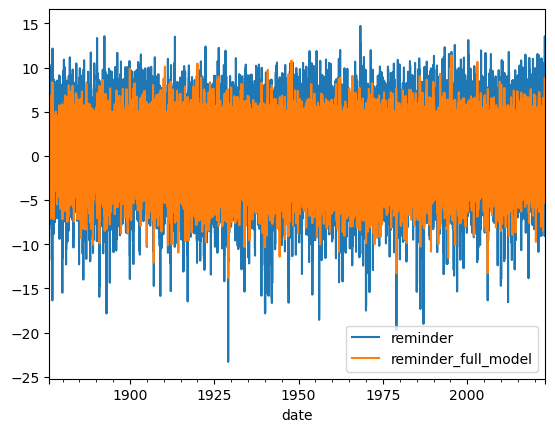

In [77]:
df_s[['reminder', 'reminder_full_model']].plot()

<AxesSubplot:xlabel='date'>

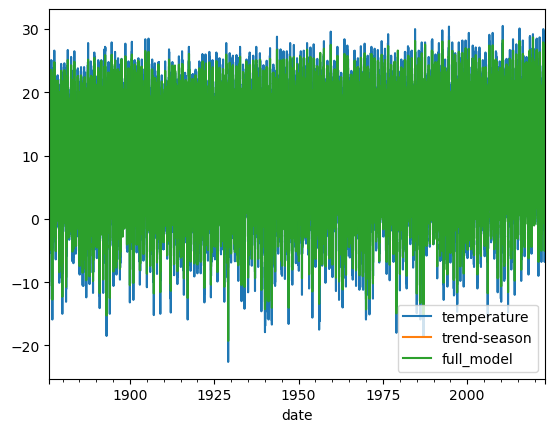

In [78]:
df_s[['temperature', 'trend-season','full_model']].plot()

<AxesSubplot:xlabel='date'>

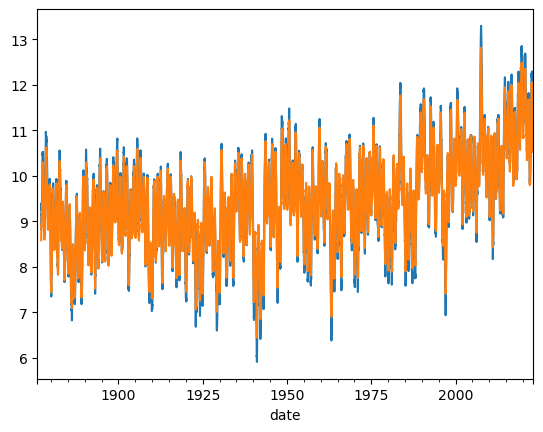

In [79]:
df_s['temperature'].rolling(400).mean().plot()
df_s['full_model'].rolling(400).mean().plot()

* Check the score

In [80]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
ts_split = TimeSeriesSplit(n_splits=5)

In [81]:
time_series_split = ts_split.split(X_full, y_full)

In [82]:
result = cross_val_score(estimator=m_full, X=X_full, y=y_full, cv=time_series_split)

In [83]:
result

array([0.90456074, 0.91201462, 0.91458892, 0.90826411, 0.91950505])

In [84]:
round(result.mean(), 3)

0.912

## Predict future

In [85]:
time_step = df_s['time_steps'].max() + 1
months = [0] * 11
months[0] = 1
lag1 = df_s.loc['2023-01-30', 'reminder']
lag2 = df_s.loc['2023-01-29', 'reminder']
lag3 = df_s.loc['2023-01-28', 'reminder']
lag4 = df_s.loc['2023-01-27', 'reminder']


In [86]:
X_future2 = pd.DataFrame([[time_step] + months + [lag1]+[lag2]+[lag3]+[lag4]], columns = X_full.columns)

In [87]:
m_full.predict(X_future2)

array([4.47283231])

#  Using Arima

### readme: https://www.projectpro.io/article/how-to-build-arima-model-in-python/544

#### Determine which p, q and d is needed for the modeling:

In [88]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.ar_model import ar_select_order
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

####  On the remider: After removing the trend+seasonality

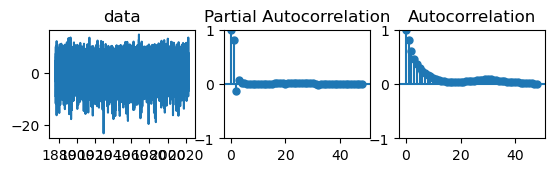

In [133]:
f=plt.figure()
ax1=f.add_subplot(331)
ax1.set_title('data')
ax1.plot(df.temperature)
ax2=f.add_subplot(332)
plot_pacf(df.temperature, ax=ax2)
ax3=f.add_subplot(333)
plot_acf(df.temperature, ax=ax3)
plt.show()

#### On their diff

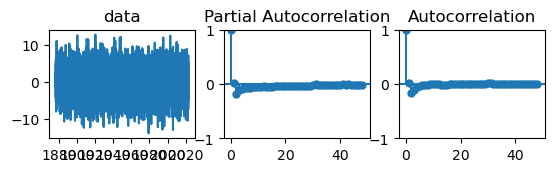

In [134]:
f=plt.figure()
ax1=f.add_subplot(331)
ax1.set_title('data')
ax1.plot(df.temperature.diff().dropna())
ax2=f.add_subplot(332)
plot_pacf(df.temperature.diff().dropna(), ax=ax2)
ax3=f.add_subplot(333)
plot_acf(df.temperature.diff().dropna(), ax=ax3)
plt.show()

Looks like no differencing is needed: d=0

we can check the p-values for the original and diff to make sure about the satationarity 

In [135]:
result=adfuller(df_s.reminder)
print('p_value=', result[1])
result=adfuller(df_s.reminder.dropna())
print('p_value=', result[1])

p_value= 0.0
p_value= 0.0


Also p=1 and q= 4 seems quite good!   
#### Fit Arima

In [166]:
arima_model=ARIMA(df.temperature, order=(1,0,0))

/Users/kasiafalecka/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/kasiafalecka/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/kasiafalecka/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [167]:
model=arima_model.fit()

In [174]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            temperature   No. Observations:                53722
Model:                 ARIMA(1, 0, 0)   Log Likelihood             -122256.126
Date:                Thu, 06 Apr 2023   AIC                         244518.252
Time:                        17:28:23   BIC                         244544.926
Sample:                    01-01-1876   HQIC                        244526.580
                         - 01-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4300      0.223     42.336      0.000       8.993       9.867
ar.L1          0.9542      0.001    806.985      0.000       0.952       0.957
sigma2         5.5484      0.029    188.613      0.000       5.491       5.606
===================================================================================
Ljung-Box (L1) (Q):                 130.01   Jarque-Bera (JB):              1516.25
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.13
Prob(H) (two-sided):                  0.90   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

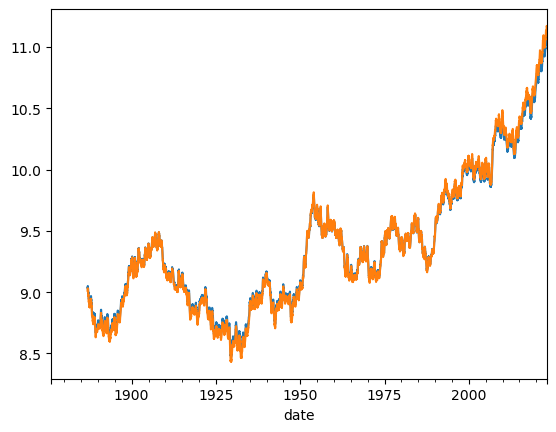

In [171]:
(model.predict(dynamics=False)).rolling(4000).mean().plot()
# * ypred was the trend+seasonality
df.temperature.rolling(4000).mean().plot()

Check the accuracy

In [169]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(df.temperature,model.predict(dynamics=False), squared=False)

2.3556975840822783

In [173]:
 model.predict(start ='2023.02.1', end='2023.03.3', dynamic= False)

2023-02-01    4.534724
2023-02-02    4.758708
2023-02-03    4.972444
2023-02-04    5.176400
2023-02-05    5.371024
2023-02-06    5.556743
2023-02-07    5.733964
2023-02-08    5.903077
2023-02-09    6.064452
2023-02-10    6.218443
2023-02-11    6.365388
2023-02-12    6.505610
2023-02-13    6.639416
2023-02-14    6.767100
2023-02-15    6.888941
2023-02-16    7.005208
2023-02-17    7.116154
2023-02-18    7.222025
2023-02-19    7.323051
2023-02-20    7.419455
2023-02-21    7.511448
2023-02-22    7.599231
2023-02-23    7.682998
2023-02-24    7.762933
2023-02-25    7.839210
2023-02-26    7.911997
2023-02-27    7.981453
2023-02-28    8.047732
2023-03-01    8.110977
2023-03-02    8.171330
2023-03-03    8.228920
Freq: D, Name: predicted_mean, dtype: float64